In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nyc_taxi.csv")

In [3]:
df.head(3)

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210


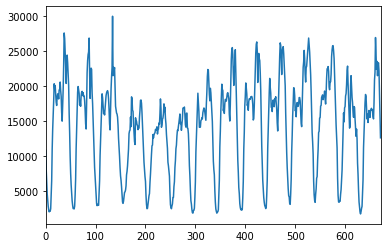

In [4]:
df.value[:48*14].plot()

In [5]:
(48*2 + 3) // 48 % 7

2

In [6]:
def whichday(x):
    days = ["Th", "Fr", "Sa", "Su", "M", "Tu", "W"]
    return days[x //48 % 7]
df["weekday"] = [whichday(x) for x in df.index.values]

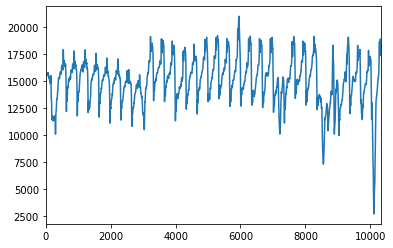

In [7]:
df.value.rolling(48).mean().plot()

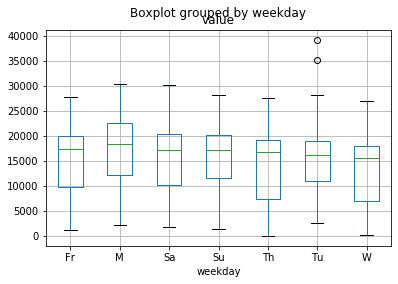

In [8]:
df.boxplot(column='value',by='weekday')

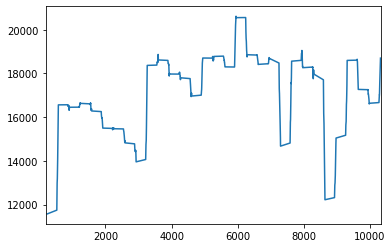

In [9]:
df[df.weekday == "M"].value.rolling(48).mean().plot()

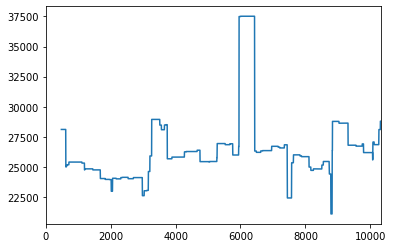

In [18]:
days = 10
df['rollmax'] = df.value.rolling(48*days).max()
df['rollmin'] = df.value.rolling(48*days).min()
df['range'] = df.rollmax-df.rollmin
df.range.plot()